In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import  OrdinalEncoder

In [3]:
train = pd.read_csv('./train.csv').drop(columns=['ID'])
test = pd.read_csv('./test.csv').drop(columns=['ID'])

X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

In [5]:
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [7]:
# 카테고리형 컬럼들을 문자열로 변환
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)

In [9]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_encoded = X.copy()
X_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

X_test_encoded = test.copy()
X_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

In [11]:
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

In [13]:
X_train_encoded[numeric_columns] = X_train_encoded[numeric_columns].fillna(0)
X_test_encoded[numeric_columns] = X_test_encoded[numeric_columns].fillna(0)

In [15]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X_train_encoded, y, test_size=0.2, random_state=42)
lgbm=LGBMClassifier(n_jobs=-1, random_state=42, class_weight='balanced')
scores=cross_validate(lgbm,train_input, train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.6280866003510825 0.6187292763799492


In [19]:
lgbm.fit(train_input, train_target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [21]:
# 중요도가 적은 feature 거르기
feature_importances = lgbm.feature_importances_
# DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': train_input.columns,
    'Importance': feature_importances
})

# 중요도 기준으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
indices = np.argsort(feature_importances)[::-1]
selection=[]
for i in range(train_input.shape[1]):
  print(train_input.columns[indices[i]], feature_importances[indices[i]])
  if feature_importances[indices[i]]<=15:
    selection.append(train_input.columns[indices[i]])


시술 당시 나이 306
이식된 배아 수 206
총 생성 배아 수 182
시술 시기 코드 179
배아 이식 경과일 178
수집된 신선 난자 수 166
저장된 배아 수 111
IVF 시술 횟수 110
클리닉 내 총 시술 횟수 106
미세주입된 난자 수 102
혼합된 난자 수 86
해동된 배아 수 81
임신 시도 또는 마지막 임신 경과 연수 73
파트너 정자와 혼합된 난자 수 64
총 임신 횟수 64
난자 기증자 나이 59
총 시술 횟수 57
총 출산 횟수 52
특정 시술 유형 49
정자 기증자 나이 48
불임 원인 - 남성 요인 43
미세주입에서 생성된 배아 수 40
DI 시술 횟수 39
난자 출처 37
시술 유형 37
단일 배아 이식 여부 35
불임 원인 - 난관 질환 32
미세주입 후 저장된 배아 수 31
IVF 임신 횟수 28
기증자 정자와 혼합된 난자 수 28
해동 난자 수 27
배란 자극 여부 26
불임 원인 - 배란 장애 26
정자 출처 25
IVF 출산 횟수 25
배아 생성 주요 이유 19
착상 전 유전 진단 사용 여부 18
불명확 불임 원인 17
착상 전 유전 검사 사용 여부 17
여성 주 불임 원인 16
미세주입 배아 이식 수 16
여성 부 불임 원인 16
부부 부 불임 원인 14
난자 혼합 경과일 13
DI 출산 횟수 11
불임 원인 - 자궁내막증 11
PGS 시술 여부 11
남성 주 불임 원인 10
DI 임신 횟수 10
PGD 시술 여부 10
남성 부 불임 원인 8
배아 해동 경과일 7
기증 배아 사용 여부 4
부부 주 불임 원인 3
대리모 여부 3
배란 유도 유형 3
불임 원인 - 정자 형태 2
저장된 신선 난자 수 2
불임 원인 - 정자 농도 1
불임 원인 - 여성 요인 0
불임 원인 - 자궁경부 문제 0
불임 원인 - 정자 면역학적 요인 0
불임 원인 - 정자 운동성 0
신선 배아 사용 여부 0
동결 배아 사용 여부 0
난자 채취 경과일 0
난자 해동 경과일 0


In [23]:
train_selection=train_input.drop(columns=selection)
test_selection=test_input.drop(columns=selection)

In [25]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'learning_rate': [0.05,0.1],
    'n_estimators': [400,500],
    'num_leaves': [16,32],
    'max_depth': [10,15]
}
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='roc_auc',cv=splitter, n_jobs=-1,verbose=1)
grid_search.fit(train_input, train_target)

print('grid_search.best_params_:', grid_search.best_params_)
print('grid_search.best_score_:',grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
grid_search.best_params_: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 400, 'num_leaves': 16}
grid_search.best_score_: 0.7392647798214351


<Axes: >

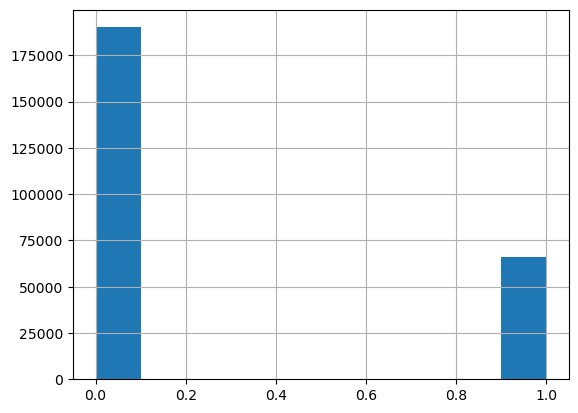

In [27]:
train['임신 성공 여부'].hist()

<Axes: >

C:\Users\wpsxk\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\wpsxk\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
C:\Users\wpsxk\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  func(*args, **kwargs)
C:\Users\wpsxk\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\wpsxk\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  func(*args, **kwargs)
C:\Users\wpsxk\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current 

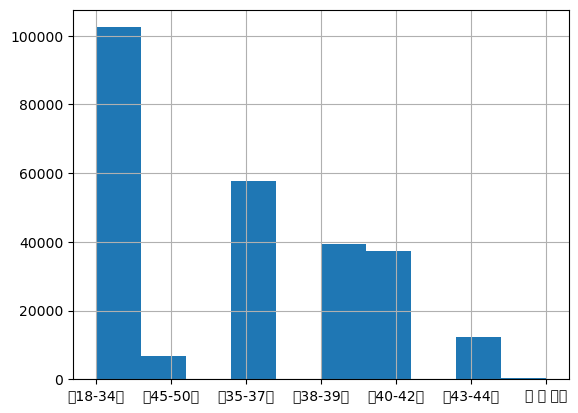

In [29]:
train['시술 당시 나이'].hist()

In [31]:
lgbm1=LGBMClassifier(n_jobs=-1, random_state=42, n_estimators=400, max_depth=15, num_leaves=16,  learning_rate=0.05, class_weight='balanced')
evals = [(train_input,train_target), (test_input, test_target)]
lgbm1.fit(train_input, train_target, eval_metric='roc_auc_score',
       eval_set=evals)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 62
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=15,
               n_estimators=400, n_jobs=-1, num_leaves=16, random_state=42)

In [33]:
from sklearn.metrics import roc_auc_score
test_pred = lgbm1.predict(test_input)
print(roc_auc_score(test_target, test_pred))

0.6731635884124763


In [35]:
pred_proba = lgbm1.predict_proba(X_test_encoded)[:, 1]

In [37]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['probability'] = pred_proba

In [39]:
sample_submission.to_csv('./baseline_submit8.csv', index=False)